## **Testando os agentes de recuperação de documentos e geração de texto**

### Importações necessárias

In [1]:
import sys
import os

from typing import List, TypedDict
from langchain_core.documents import Document
from langgraph.graph import StateGraph, END

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from src import retriever_agent, generate_answer

### Recuperando documentos a partir de um prompt

In [2]:
print(retriever_agent.get_relevant_documents("Quais são os direitos básicos do fornecedor?"))

[Document(id='92e4a2f8-f82d-4789-9c4c-c700c709b09b', metadata={'producer': 'Adobe PDF Library 10.0.1', 'creator': 'Adobe InDesign CS6 (Windows)', 'creationdate': '2017-10-18T12:07:27-02:00', 'moddate': '2017-10-18T12:20:15-02:00', 'trapped': '/False', 'source': 'data\\raw\\codigo_defesa_consumidor.pdf', 'total_pages': 135, 'page': 51, 'page_label': '50'}, page_content='§ 2o O cadastro será divulgado anualmen -\nte, podendo o órgão responsável fazê-lo em \nperíodo menor, sempre que julgue necessá -\nrio, e conterá informações objetivas, claras e \nverdadeiras sobre o objeto da reclamação, a \nidentificação do fornecedor e o atendimento \nou não da reclamação pelo fornecedor.\n§ 3o Os cadastros deverão ser atualizados \npermanentemente, por meio das devidas \nanotações, não podendo conter informações \nnegativas sobre fornecedores, referentes a pe -\nríodo superior a cinco anos, contado da data \nda intimação da decisão definitiva.\nArt. 60.  Os cadastros de reclamações funda -\nmentadas

In [4]:
print(retriever_agent.get_relevant_documents("Reembolso"))

[Document(id='0371489c-ea03-4ca6-85aa-73ff15e01f52', metadata={'producer': 'Adobe PDF Library 10.0.1', 'creator': 'Adobe InDesign CS6 (Windows)', 'creationdate': '2017-10-18T12:07:27-02:00', 'moddate': '2017-10-18T12:20:15-02:00', 'trapped': '/False', 'source': 'data\\raw\\codigo_defesa_consumidor.pdf', 'total_pages': 135, 'page': 103, 'page_label': '102'}, page_content='para a cobertura dos casos de urgência e \nemergência;\nVI – reembolso, em todos os tipos de pro -\ndutos de que tratam o inciso I e o §\xa01o do art.\xa01o \ndesta Lei, nos limites das obrigações contra -\ntuais, das despesas efetuadas pelo beneficiário \ncom assistência à saúde, em casos de urgência \nou emergência, quando não for possível a \nutilização dos serviços próprios, contratados, \ncredenciados ou referenciados pelas opera -\ndoras, de acordo com a relação de preços de \nserviços médicos e hospitalares praticados pelo \nrespectivo produto, pagáveis no prazo máximo \nde trinta dias após a entrega da document

### Gerando uma resposta a partir dos documentos

In [2]:
prompt = "Quero fabricar um avião"
retrieved_docs = retriever_agent.get_relevant_documents(question=prompt)

response = generate_answer(question=prompt, documents=retrieved_docs)

print(response)

--- Utilizando o provedor de LLM: ollama | Modelo: llama3.2:1b ---
Com base nos documentos fornecidos, não encontrei informações sobre a questão específica que você mencionou, "Quero fabricar um avião". No entanto, posso fornecer algumas informações relevantes sobre a legislação brasileira em relação à responsabilidade civil e ao direito de fabricação.

O artigo 12 da Lei nº 10.826/2003, que é o texto atualizado da Lei de Responsabilidade Civil, estabelece que os fabricantes, produtores, construtores, importadores e fornecedores de produtos ou serviços devem assegurar a reparação dos danos causados aos consumidores por defeitos decorrentes de projetos, fabricações, construções, montagens, fórmulas, manipulação, apresentação ou acondomento de seus produtos.

Além disso, o artigo 33 da Lei nº 10.826/2003 estabelece que em caso de oferta ou venda por telefone ou reembolso postal, deve constar o nome do fabricante e endereço na embalagem, publicidade e em todos os impressos utilizados na t

### Criando o grafo da aplicação

In [8]:
from IPython.display import Image, display

class GraphState(TypedDict):
    question: str
    documents: List[Document]
    answer: str
    
# --- NÓS DO GRAFO ---

def retrieve_node(state: GraphState):
    """
    Nó que executa o agente Retriever.
    Pega a 'question' do estado e atualiza o estado com os 'documents'.
    """
    question = state["question"]
    documents = retriever_agent.get_relevant_documents(question)
    return {"documents": documents}

def answer_node(state: GraphState):
    """
    Nó que executa o agente Answerer.
    Pega a 'question' e os 'documents' do estado e atualiza o estado com a 'answer'.
    """
    question = state["question"]
    documents = state["documents"]
    answer = generate_answer(question, documents)
    return {"answer": answer}

# --- CONSTRUÇÃO DO GRAFO ---

def build_graph():
    """
    Constrói o grafo LangGraph conectando os nós.
    """
    workflow = StateGraph(GraphState)

    # Adiciona os nós ao grafo
    workflow.add_node("retriever", retrieve_node)
    workflow.add_node("answerer", answer_node)

    # Define as arestas (o fluxo)
    workflow.set_entry_point("retriever") # O ponto de partida é o retriever
    workflow.add_edge("retriever", "answerer") # Depois do retriever, vá para o answerer
    workflow.add_edge("answerer", END) # Depois do answerer, o fluxo termina

    # Compila o grafo em um objeto executável
    app = workflow.compile()
    return app

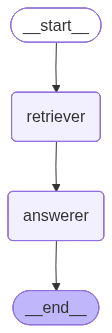

Nó 'retriever' finalizado.
--- Utilizando o provedor de LLM: ollama | Modelo: llama3.2:1b ---
Nó 'answerer' finalizado.
--- Utilizando o provedor de LLM: ollama | Modelo: llama3.2:1b ---

--- RESPOSTA FINAL ---

Com base nos documentos fornecidos, não encontrei informações sobre os direitos específicos mencionados na pergunta. No entanto, podemos identificar alguns direitos fundamentais do consumidor que estão abordados no texto:

1.  Direito à proteção contra práticas nocivas: Artigo 6º do Código de Defesa do Consumidor estabelece que o consumidor tem direito a ser protegido contra práticas nocivas, como publicidade enganaosa e abusiva.
2.  Direito à informação adequada e clara sobre produtos e serviços: Artigo 3º do Código de Defesa do Consumidor estabelece que o consumidor tem direito a ser informado adequadamente e claramente sobre os produtos e serviços, incluindo informações sobre características, composição, qualidade, tributos incidentes e preço.
3.  Direito à proteção contra r

In [9]:
graph = build_graph()
display(Image(graph.get_graph().draw_mermaid_png()))

inputs = {"question": "Quais são os direitos básicos do consumidor?"}

for output in graph.stream(inputs):
    for key, value in output.items():
        print(f"Nó '{key}' finalizado.")
        # print(value) # Descomente para ver o conteúdo completo do estado
        
# O resultado final está no último valor do stream
final_state = list(graph.stream(inputs))[-1]
final_answer = final_state['answerer']['answer']

print("\n--- RESPOSTA FINAL ---\n")
print(final_answer)